## Question 1

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage


Here is the head of the baseball dataset as well as the summary statistics. 

In [3]:
# Question 1 - Clustering numerical data
# pairwise scatter plots and summary statistics

baseball = pd.read_csv('baseball.csv')
print(baseball.head())
print(baseball.describe())

    playerID  total_hits  total_hr  total_rbi  total_sb firstName     lastName
0  aaronha01        3771       755       2297       240      Hank        Aaron
1  abbated01         772        11        324       142        Ed  Abbaticchio
2  abbotku01         523        62        242        22      Kurt       Abbott
3  abreubo01        2470       288       1363       400     Bobby        Abreu
4  abreujo02        1038       179        611        10      Jose        Abreu
        total_hits     total_hr    total_rbi     total_sb
count  2367.000000  2367.000000  2367.000000  2367.000000
mean   1207.395015   105.878327   566.757921    97.017322
std     603.306283   106.597375   343.346248   115.826335
min     501.000000     0.000000    92.000000     0.000000
25%     732.500000    31.000000   319.000000    23.000000
50%    1056.000000    75.000000   467.000000    55.000000
75%    1521.500000   139.000000   721.000000   128.000000
max    4256.000000   762.000000  2297.000000  1406.000000


Here are the pairwise scatter plots.

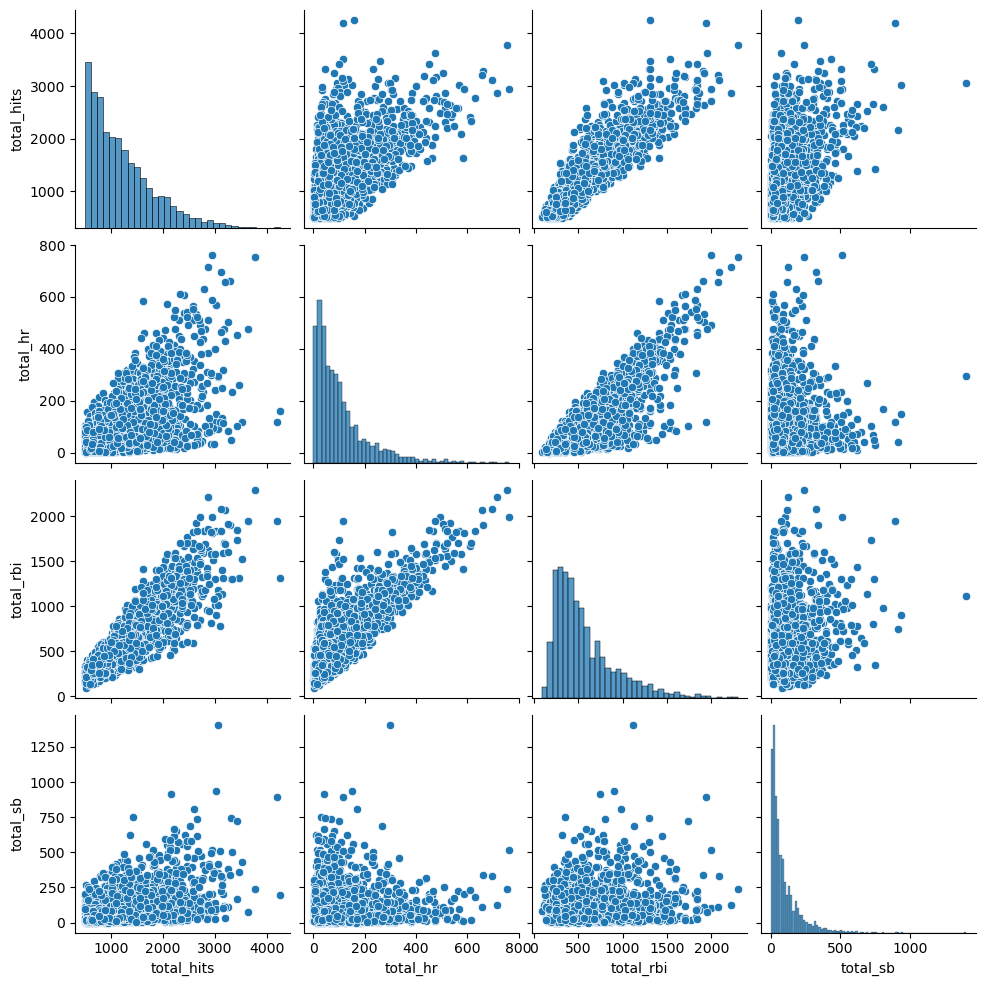

In [4]:
sns.pairplot(data = baseball, vars = ['total_hits', 'total_hr', 'total_rbi', 'total_sb'])
plt.show()

/Users/marynydegger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marynydegger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marynydegger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marynydegger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

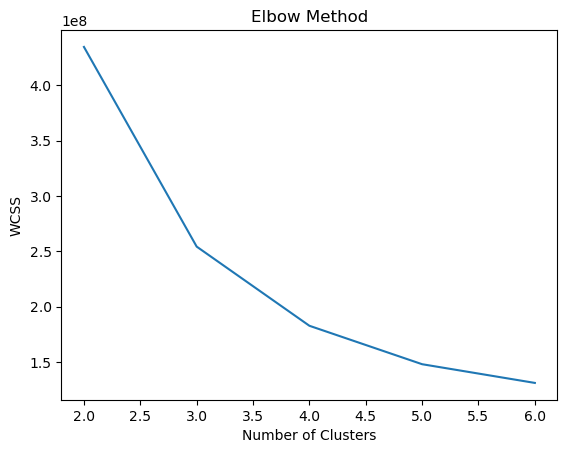

In [5]:
# K-Means Clustering, WCSS, Silhouette scores

wcss = []
silhouette_scores = []
davies_scores = []

for k in range(2,7):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(baseball[['total_hits', 'total_hr', 'total_rbi', 'total_sb']])
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(baseball[['total_hits', 'total_hr', 'total_rbi', 'total_sb']], kmeans.labels_))
    davies_scores.append(davies_bouldin_score(baseball[['total_hits', 'total_hr', 'total_rbi', 'total_sb']], kmeans.labels_))

plt.plot(range(2,7), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

    

To determine which cluster number, look for the point of diminishing returns or the point where the metric stabilizes, indicating a suitable number. The ideal number should balance complexity and interpretability, providing meaningful clusters.

For the elbow method, K looks like it is at 3.

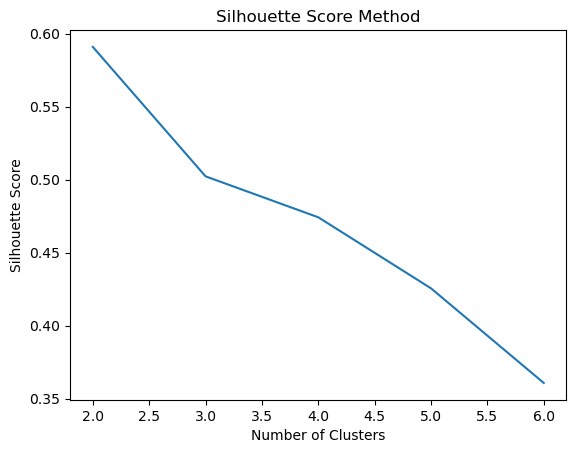

In [6]:
plt.plot(range(2, 7), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

K looks like it is 2 because that gives the highest silhouette score

In [7]:
print('Davies Bouldin Scores: ', davies_scores)

Davies Bouldin Scores:  [0.6478834689233651, 0.7138956212252162, 0.7971897818543066, 0.8660630554439663, 0.9433430689440604]


Minimum Davies Bouldin Score is the first one, so cluster 2. 

Because 2 of the 3 methods tell us that cluster 2 is the right amount, we will choose 2. 

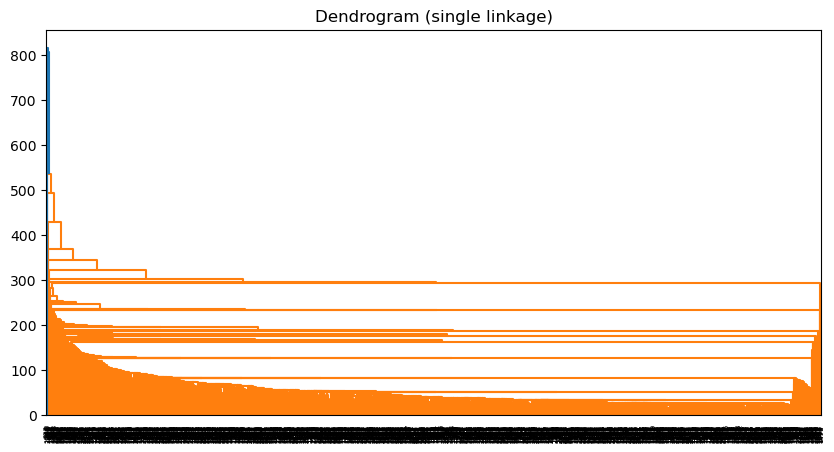

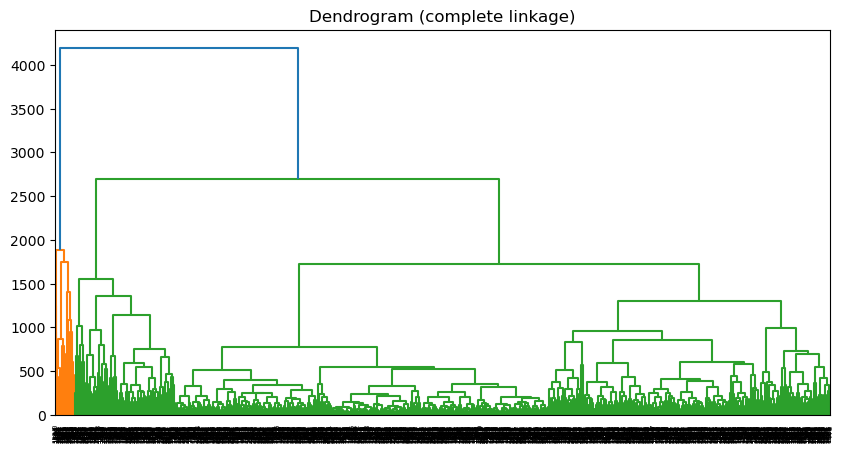

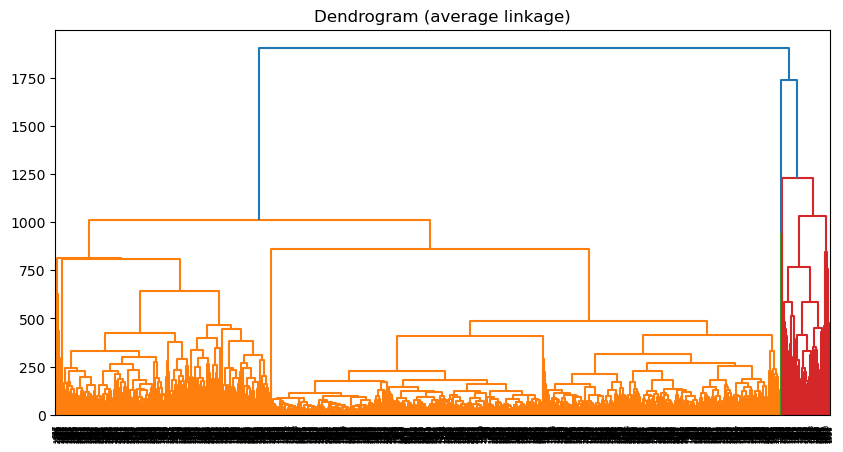

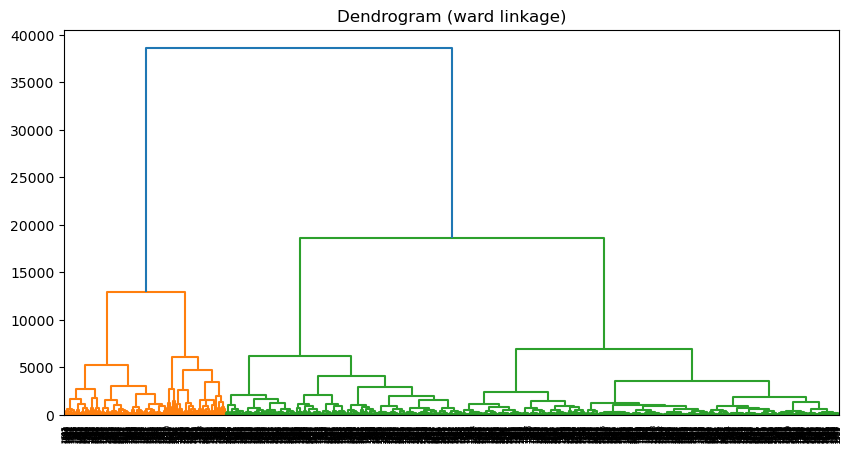

In [8]:
# Hierarchichal Agglomerative Clustering

methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    Z = linkage(baseball[['total_hits', 'total_hr', 'total_rbi', 'total_sb']], method = method)
    plt.figure(figsize = (10, 5))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.show()

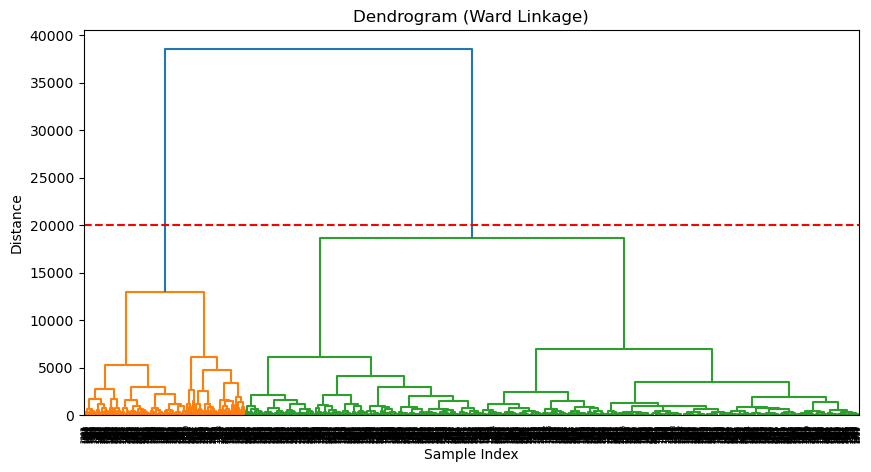

In [9]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=20000, color='r', linestyle='--')  # Adding a horizontal line for the cutoff
plt.show()

From the ward linkage, the largest vertical distance that does not intersect any horizontal lines is from green to blue which is about 20,000. Cutting the dendrogram at this height can give us a reasonable number of clusters. 

I added a horizontal line at y = 20,000. There are 2 vertical lines that intersect with this horizontal line, which tells us that the cluster number should be 2 - confirming my analysis with the KMeans clustering. 

In [10]:
# GMM Clustering 
data_for_clustering = baseball[['total_hits', 'total_hr', 'total_rbi', 'total_sb']]


gmm = GaussianMixture(n_components = 2, random_state = 42)
gmm.fit(data_for_clustering)

baseball['cluster'] = gmm.predict(data_for_clustering)

print('Means:\n ', gmm.means_)
print('Covariances:\n ', gmm.covariances_)
print('Weights:\n ', gmm.weights_)



Means:
  [[1717.55060045  155.52877023  822.87232356  175.43931768]
 [ 871.82869576   73.21963043  398.2929088    45.4334884 ]]
Covariances:
  [[[ 3.63776915e+05  4.35081663e+04  1.92095213e+05  1.70280882e+04]
  [ 4.35081663e+04  2.00574604e+04  4.53430105e+04 -5.61099069e+03]
  [ 1.92095213e+05  4.53430105e+04  1.50728637e+05 -6.41803652e+03]
  [ 1.70280882e+04 -5.61099069e+03 -6.41803652e+03  2.14641821e+04]]

 [[ 8.00603446e+04  7.38489725e+03  3.75203445e+04  2.25054118e+03]
  [ 7.38489725e+03  2.94795614e+03  6.86385067e+03 -3.75226267e+02]
  [ 3.75203445e+04  6.86385067e+03  2.46747465e+04 -2.12820227e+02]
  [ 2.25054118e+03 -3.75226267e+02 -2.12820227e+02  1.40610071e+03]]]
Weights:
  [0.39678092 0.60321908]


In [11]:
probabilities = gmm.predict_proba(baseball[['total_hits', 'total_hr', 'total_rbi', 'total_sb']])
anomalies = np.where(np.max(probabilities, axis = 1) < 2)
print('Anomalies indices: ', anomalies)

Anomalies indices:  (array([   0,    1,    2, ..., 2364, 2365, 2366]),)


Some external factors that could explain these anomalies could be injury or health issues among the baseball players, the different levels of player ecperiences, changes in the playing conditions, or statistical errors like data entry errors, sample size errors, or outliers in performance.  

For the most effective method, i think the Hierarchichal Agglomerative Clustering showed results that were most consistent. In each of the linkage methods, cluster 2 came out the most. This looks like it was the most efficient at getting 2. 

        total_hits                                                       \
             count        mean         std    min    25%    50%     75%   
cluster                                                                   
1           1452.0  872.061295  277.925563  501.0  632.0  810.5  1064.0   

                total_hr            ... total_rbi        total_sb             \
            max    count      mean  ...       75%    max    count       mean   
cluster                             ...                                        
1        1687.0   1452.0  72.89876  ...     499.0  887.0   1452.0  44.772039   

                                                  
               std  min   25%   50%   75%    max  
cluster                                           
1        36.070644  0.0  16.0  34.0  65.0  160.0  

[1 rows x 32 columns]


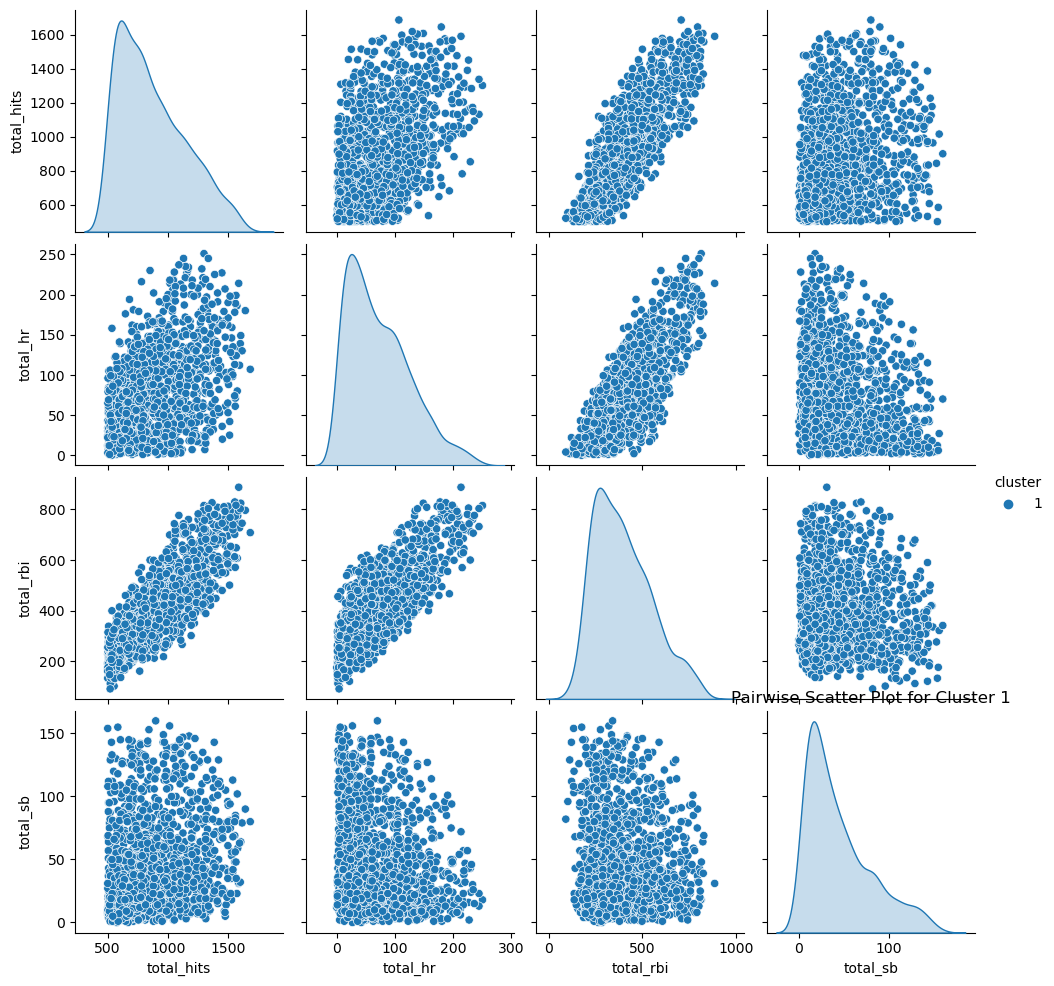

In [12]:
# Summary statistics and plotting for selected cluster grouping 

selected_cluster = 1

# Filter data for the selected cluster
selected_data = baseball[baseball['cluster'] == selected_cluster]

# Summary statistics for each cluster
summary_stats = selected_data.groupby('cluster').describe()

# Display summary statistics
print(summary_stats)

# Pairwise scatter plots colored by group membership
sns.pairplot(selected_data, vars=['total_hits', 'total_hr', 'total_rbi', 'total_sb'], hue='cluster')
plt.title(f'Pairwise Scatter Plot for Cluster {selected_cluster}')
plt.show()


### There are more shapes with my cluster grouping 0. 

#### Total Hits
The mean number of hits is relatively high (1739.53), with a wide spread (std = 597.88). The range spans from 504 to 4256 hits.
25% of the players have fewer than 1335.5 hits, while 75% have fewer than 2092 hits.

#### Total Home Runs
The mean for home runs is 158.21, indicating a tendency for a considerable number of home runs.

#### Total RBIs
The 75th percentile for RBIs is at 1070, indicating that most players in this cluster have a high number of runs batted in.

#### Total Stolen Bases
Players have a mean of 179.92 stolen bases, with a wide variation (std = 146.44).

Cluster 0 = 'Power Hitters'
These players seem to excel in hitting, with a high average number of hits and a considerable number of home runs.
They also display strength in generating runs, as indicated by the high RBI counts.
Despite their power hitting, they maintain a noteworthy capability in stealing bases, showcasing versatility in their offensive skills.

### For cluster group 1: 
#### Total Hits:
The mean number of hits is 872.06, with a moderate standard deviation (277.93). The range spans from 501 to 1687 hits.
25% of the players have fewer than 632 hits, while 75% have fewer than 1064 hits.

#### Total Home Runs:
The mean for home runs is 72.90, indicating a moderate tendency for hitting home runs.

#### Total RBIs
The 75th percentile for RBIs is at 499, suggesting that most players in this cluster have a moderate number of runs batted in.

#### Total Stolen Bases:
Players have a mean of 44.77 stolen bases, with a standard deviation of 36.07.

Cluster 1 = 'Balanced Performers'
These players exhibit moderate performance in terms of hits, home runs, RBIs, and stolen bases.
They maintain a balanced profile across various offensive metrics without extreme highs or lows, demonstrating consistent overall performance.
This cluster might encompass players who contribute reasonably well across different aspects of the game without specializing in any specific skill set.



In [13]:
print(baseball.columns)
print(baseball.head())


Index(['playerID', 'total_hits', 'total_hr', 'total_rbi', 'total_sb',
       'firstName', 'lastName', 'cluster'],
      dtype='object')
    playerID  total_hits  total_hr  total_rbi  total_sb firstName  \
0  aaronha01        3771       755       2297       240      Hank   
1  abbated01         772        11        324       142        Ed   
2  abbotku01         523        62        242        22      Kurt   
3  abreubo01        2470       288       1363       400     Bobby   
4  abreujo02        1038       179        611        10      Jose   

      lastName  cluster  
0        Aaron        0  
1  Abbaticchio        1  
2       Abbott        1  
3        Abreu        0  
4        Abreu        1  


## Question 2 

In [14]:
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim import corpora, models
import gensim

In [15]:
file = 'health_tweets.txt'  

# Open the file in read mode ('r')
with open(file, 'r', encoding='utf-8') as file:
    tweets = file.readlines()

# Display the first few tweets as an example
for i in range(5):
    print(tweets[i])

text

Ambulances 'face hours of A&amp;E waits' http://bbc.in/J4xzNy

Kobe Bryant injures wrist: Lessons for him and for weekend warriors http://lat.ms/se2f7a

Cancer Disparity Among Black Women Unresolved http://n.pr/1pVFLxt

Scary faces terrify woman with unusual condition http://nbcnews.to/ZfPJxL



In [16]:
def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)  
    tweet = re.sub('@[^\s]+', '', tweet)  
    tokens = word_tokenize(tweet) 
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]  
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  
    return ' '.join(tokens)

preprocessed_tweets = [preprocess_tweet(tweet) for tweet in tweets]

In [17]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_tweets)

#### Justification and Impact on Outcome:
- removing URLs: they don't add semantic value to topics and usually are just noise. we can better focus on the textual content. It enhances the quality of our topics by elimination irrelevant information 

- tokenization: it breaks text into meaningful units which enables an analysis on a word-level basis. It facilitates the model's understanding of individual words, aiding in identifying key terms that contribute to specific topics.

- removing stop words: these words appear frequentely but hold little semantic meaning. removing them reduces noise and focuses on informative terms. It helps identify keywords that differentiate topics by elimination common words.

- stemming: reducing words to their root forms normalizes variations and reduces feature space. This helps in consolidation similar words, reducing vocabulary size, and capturing the core meaning of words. 

- encoding with TF-IDF: this assigns weights to words based on their importance and relevance. it helps capture semantic relationships between words. It emphasizes important words specific to tweets, enabling the model to understand relationships between words. 

## Topic Modeling with KMeans

/Users/marynydegger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


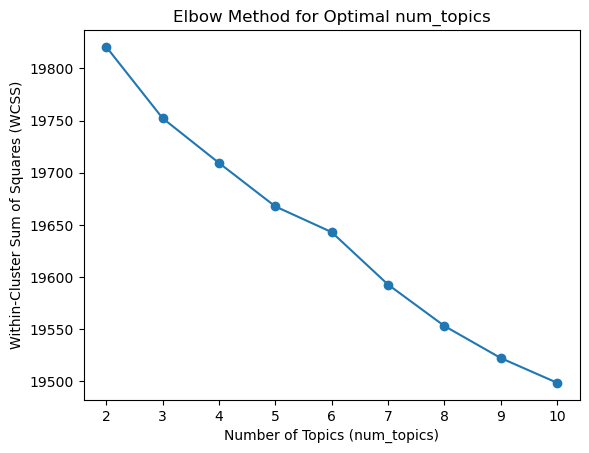

In [18]:
# Topic Modeling with KMeans

wcss = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker = 'o')
plt.title('Elbow Method for Optimal num_topics')
plt.xlabel('Number of Topics (num_topics)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()




In [19]:
optimal_num_topics = 6
kmeans = KMeans(n_clusters=optimal_num_topics, random_state=42)
kmeans.fit(tfidf_matrix)

cluster_labels = kmeans.labels_

tweets_clustered = {i: [] for i in range(optimal_num_topics)}
for i, label in enumerate(cluster_labels):
    tweets_clustered[label].append(preprocessed_tweets[i])

for i in range(optimal_num_topics):
    print(f"Cluster {i + 1} - Representative Tweets:")
    print('\n'.join(tweets_clustered[i][:5]))  
    print('\n')


Cluster 1 - Representative Tweets:
microb transplant treat diseas drug ca n't fix
high fruit veggi diet link lower risk heart diseas , death
cdc 's lab problem rippl effect investig diseas
first gene therapi west , rare diseas , horizon
sleep may eas symptom parkinson 's diseas : studi :


Cluster 2 - Representative Tweets:
text
ambul 'face hour & amp ; e wait '
kobe bryant injur wrist : lesson weekend warrior
scari face terrifi woman unusu condit
india court bar cipla sell copi novarti respiratori drug


Cluster 3 - Representative Tweets:
latest health advic : shake hand doctor . tri fist bump high five instead :
five way improv mental health care 2015 # nh # mentalhealth
n't miss take call health law morn 8:30 a.m . et . # aca
recip health : peanut dukkah
doctor , nurs home need improv health system


Cluster 4 - Representative Tweets:
cancer dispar among black women unresolv
one five ivi leaguer use prescript stimul , studi suggest
marriag forg internet last longer ? studi say ye ! 

## Topic Modeling with LDA

In [20]:
dictionary = corpora.Dictionary([tweet.split() for tweet in preprocessed_tweets])
corpus = [dictionary.doc2bow(tweet.split()) for tweet in preprocessed_tweets]

# Experiment with different num_topics, alpha, and beta values
num_topics = 6  # Example value for number of topics

# Experiment with alpha and beta values
alpha_values = ['symmetric', 'auto', 'asymmetric']
beta_values = ['symmetric', 'auto']

for alpha in alpha_values:
    for beta in beta_values:
        print(f"Running LDA with num_topics={num_topics}, alpha={alpha}, beta={beta}")
        lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary,
                                           alpha=alpha, eta=beta, random_state=42)

        # Display topics and representative tweets
        for idx, topic in lda_model.print_topics(num_topics=-1):
            print(f"Topic {idx}: {topic}")
            print(f"Representative Tweets for Topic {idx}:")
            topic_words = topic.split('+')
            for word_prob_pair in topic_words[:5]:  # Display first 5 representative words for each topic
                word_prob = word_prob_pair.split('*')[1].strip()
                word = word_prob.split('"')[1]
                print(word, end=' ')
            print('\n')

Running LDA with num_topics=6, alpha=symmetric, beta=symmetric
Topic 0: 0.049*"," + 0.028*"..." + 0.027*"experi" + 0.027*"'s" + 0.027*"decad" + 0.026*"probiot" + 0.026*"gone" + 0.026*"paula" + 0.026*"deen" + 0.026*"butteri"
Representative Tweets for Topic 0:
, ... experi 's decad 

Topic 1: 0.106*"''" + 0.056*"``" + 0.043*"rt" + 0.041*"." + 0.032*";" + 0.027*"nh" + 0.022*"failur" + 0.022*"va" + 0.022*"2015" + 0.022*"â"
Representative Tweets for Topic 1:
'' `` rt . ; 

Topic 2: 0.080*":" + 0.062*"#" + 0.045*"?" + 0.033*"," + 0.030*"'s" + 0.028*"nh" + 0.016*"recip" + 0.015*"." + 0.015*"miss" + 0.014*"elect"
Representative Tweets for Topic 2:
: # ? , 's 

Topic 3: 0.042*"#" + 0.032*"candi" + 0.028*"." + 0.023*"rt" + 0.022*"," + 0.018*"?" + 0.017*"!" + 0.017*"deal" + 0.014*":" + 0.013*"$"
Representative Tweets for Topic 3:
# candi . rt , 

Topic 4: 0.060*":" + 0.038*"'" + 0.032*"doctor" + 0.024*"video" + 0.022*"reaction" + 0.021*"caution" + 0.021*"statu" + 0.021*"caviti" + 0.021*"digniti

## Comparative Analysis

#### KMeans cs. LDS

Kmeans 
- Simple and intuitive clustering method that partitions data into clusters based on similarity.
- Provides clear separation between clusters, each representing a distinct set of tweets.
- Suitable for datasets where clusters are well-separated and distinct.
- Requires predefined number of clusters (num_topics), which might not always align with the natural topic structure of the data.
- Sensitivity to initialization and outliers, potentially affecting the quality of clusters.
- Treats documents as vectors in a space, doesn't capture probabilistic relationships between words and topics.

LDA
- Probabilistic generative model that considers documents as mixtures of topics and words as mixtures of topics' words.
- Provides probabilistic inference of topics, allowing words to belong to multiple topics with varying probabilities.
- Automatically infers the number of topics without requiring prior specification.
- Computationally intensive, especially with larger datasets.
- Can be sensitive to hyperparameters (e.g., alpha, beta), which might affect the quality of topics.
- Requires careful preprocessing and tuning to produce meaningful topics.

For this topic, LDA might be more effective than KMeans because of its ability to capture topic probabilities. This allows for the soft assignment of words to topics, so multiple words can belong to multiple topics, which offers more flexibility. It also could be more effective because of the inherent probabilistic modeling. LDA models the generative process of focuments and words, making it will suited ofr uncovering topic structures in text data. KMeans gives clear separation between clusters, but it might not be as good at caputring the probabilistic nature and nuances of topics present in helth-related tweets which LDA can address more easily. 


## Real World Application 

This type of modeling can offer valuable insights with these applications:

#### Early Detection of Health Trends:
- Disease Outbreak monitoring: identifying clusters of tweets discussing symptoms or outbreaks can signal for potential health concerns. 
- Emerging health issues: Recognizing new or emerging health concerns by tracking topics that gain traction in social media discussions. 

#### Public Health Campaigns and Messaging 
- Campaign effectiveness: analyze sentiment or prevalence of topics. 
- Identifying misinformation: identify and address the misinformation or misconceptions about health topics circulating on social media. 

#### Mental Health and Well-Being 
- Mental Health awareness: identifying discussions relating to mental health issues, destigmatizing conversations and providing support and resources. 
- Well-Being interventions: implementing support systems based on topics related to stress, anxiety, or other mental health indicators. 

Overall, topic modeling of health related tweets on social media can be a valuable tool for public health agencies, policymakers, healthcare providers, and the community at large to address health concerns and communication, and implement targeted interventions tailored to the needs and interests of the community. 